<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Creating Custom Layers and Models**

###### Estimated time needed:  30 minutes  

In this lab, you will learn to create custom layers and integrate them into a Keras model. You will compile, train, and evaluate the model. 

##### Learning objectives 

By the end of this lab, you will: 
- Create custom layers and integrate them into a Keras model 
- Compile, train, and evaluate the model 

##### Prerequisites:
- Basic understanding of Python and Keras. 


#### Steps 

**Step 1: Install and Import libraries**

Before you start, import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [5]:
!pip install tensorflow==2.16.2
!pip install pydot graphviz


#### After installing the libraries, restart the kernel and then run the cells below


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential


**Step 2: Define a custom layer**

Define a custom dense layer with 32 units and ReLU activation.


###  define the cutom layer based on three steps 
- define a classs than inhert from Layer with attribute units to mange nurons
- define the build function to build weights and biases with three param 1- shape, 2- initializer, trainable
- the call fucntion to build the hypothesis function  

In [20]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)


**Step 3: Integrate the custom layer into a model**

Create a Keras model using the custom layer. 


In [31]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])


The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


**Step 4: Compile the model**

Compile the model with the Adam optimizer and categorical cross-entropy loss. 


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary before building:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_3            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2            │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_3            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the model**

Train the model on some example data. For this example, you will generate random data for training. In practice, use a real data set. 


In [7]:
import numpy as np 

# Generate random data 
x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

# Convert labels to categorical one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3021   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2970 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2955 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2930 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2953 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2932 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2981 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2962 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2778 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2852 


**Step 6: Evaluate the model**

Evaluate the model using test data to see its performance. 

For this example, you will generate random test data. In practice, use a real data set. 


In [ ]:
# Generate random test data 
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

# Convert labels to categorical one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

# Evaluate the model 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

### Exercises


#### Exercise 1: Visualize Model Architecture

**Objective:** Visualize the architecture of the custom Keras model to understand its structure.

**Instructions:**
1. Use the `plot_model` function from `tensorflow.keras.utils` to visualize the model architecture.
2. Save the plot as an image file.


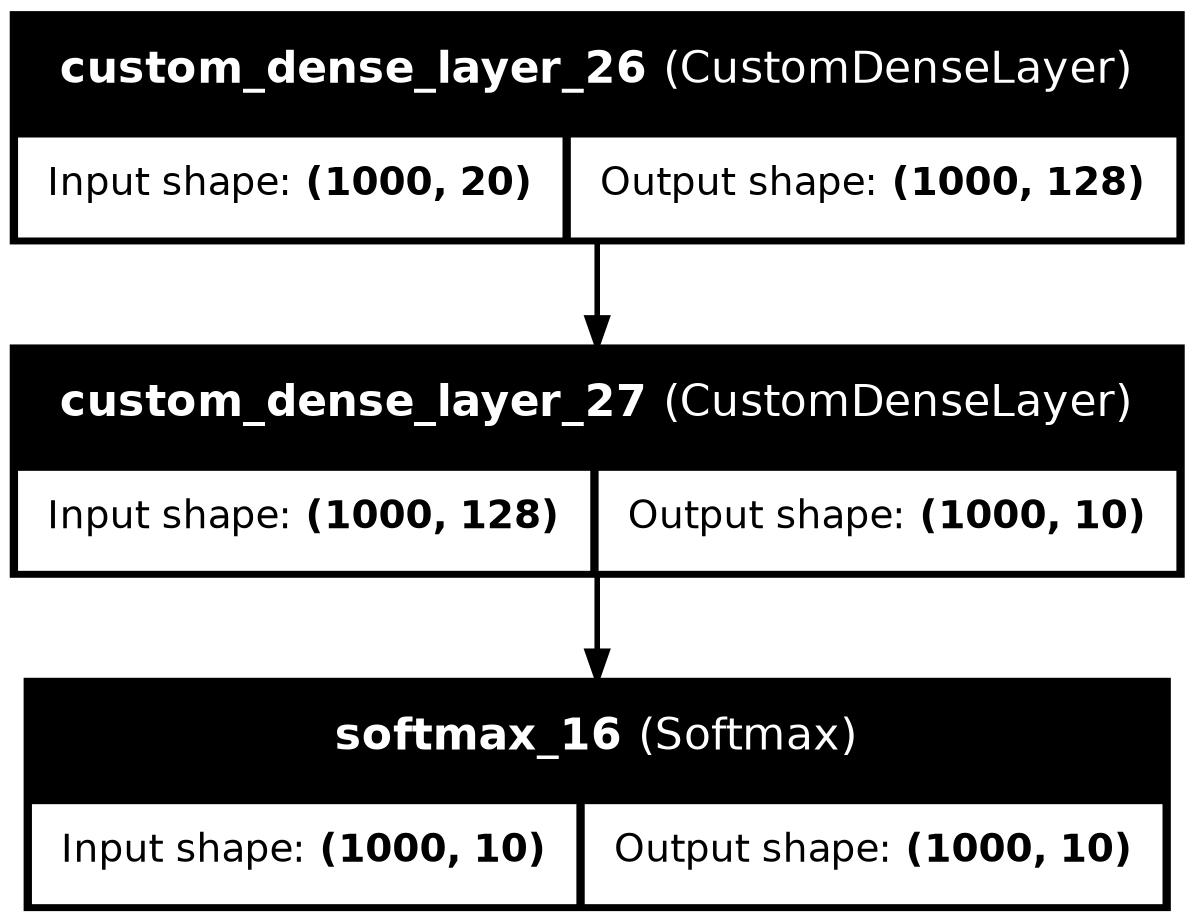

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


 ```   

</details>


#### Exercise 2: Add Dropout Layer

**Objective:** Enhance the model by adding a Dropout layer to prevent overfitting.

**Instructions:**
1. Add a Dropout layer between the custom dense layers.
2. Recompile the model and observe the impact on training.


In [69]:
#add Drotout with ration of 0.32
from tensorflow.keras.layers import Dropout

model = Sequential([CustomDenseLayer(128),
                   Dropout(rate = 0.32),
                   CustomDenseLayer(10),
                   Softmax()])
model.compile(optimizer='adam', loss = 'categorical_crossentropy')
model.summary()
model.build((1000,20))
model.summary()
model.fit(X_train,y_train,epochs=10,batch_size=32)
loss = model.evaluate(X_test,y_test)
print(f'Modle loss {loss}')

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_34           │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_35           │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_20 (Softmax)            │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_34           │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (1000, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_35           │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_20 (Softmax)            │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3027   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3006 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2999 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3007 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2960 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2947 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2966 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2932 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2877 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2892 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3147  
Modle loss 2.3139543533325195


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)
 ```   

</details>


#### Exercise 3: Adjust the Number of Units in Custom Layer

**Objective:** Experiment with different numbers of units in the custom dense layer to observe the impact on performance.

**Instructions:**
1. Change the number of units in the `CustomDenseLayer` to 128.
2. Recompile, train, and evaluate the model.


In [70]:
class CustomDenseLayer(Layer):
    def __init__ (self, units = 128):
        super(CustomDenseLayer, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.weight  = self.add_weight(shape = (input_shape[-1], self.units),
                                      initializer= 'random_normal',
                                      trainable=True)
        self.biase = self.add_weight(shape = (self.units,),
                                    initializer='zeros',
                                    trainable=True)
    def call (self,inputs):
        return tf.nn.relu(tf.matmul(inputs,self.weight) + self.biase) 

model.compile(optimizer='adam', loss = 'categorical_crossentropy')
model.summary()
model.build((1000,20))
model.summary()
model.fit(X_train,y_train,epochs=10,batch_size=32)
loss = model.evaluate(X_test,y_test)
print(f'Modle loss {loss}')

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_34           │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (1000, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_35           │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_20 (Softmax)            │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_34           │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (1000, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_35           │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_20 (Softmax)            │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2820   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2906 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2827 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2724 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2804 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2789 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2844 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2729 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2737 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2670 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3265  
Modle loss 2.3217415809631348


<details>
    <summary>Click here for Solution</summary>

```python

# Define a custom layer with 128 units
class CustomDenseLayer(Layer):
    def __init__(self, units=128):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

# Integrate the new custom layer into a model
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)
 ```   

</details>


### Summary

By completing these exercises, students will:

1. Visualize the architecture of their custom Keras model.
2. Understand the impact of adding Dropout layers to prevent overfitting.
3. Experiment with different configurations of the custom dense layer to observe performance changes.


## Conclusion 

Congratulations! You have successfully created and trained a custom layer in Keras. This lab exercise demonstrated how to extend Keras’s capabilities by creating custom layers and integrating them into a model. 


In [ ]:
Copyright © IBM Corporation. All rights reserved.